In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast cancer.zip to breast cancer.zip


ABHISHEK J - 24BAD002
Files inside ZIP: ['breast-cancer.csv']

First 5 Rows:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980           

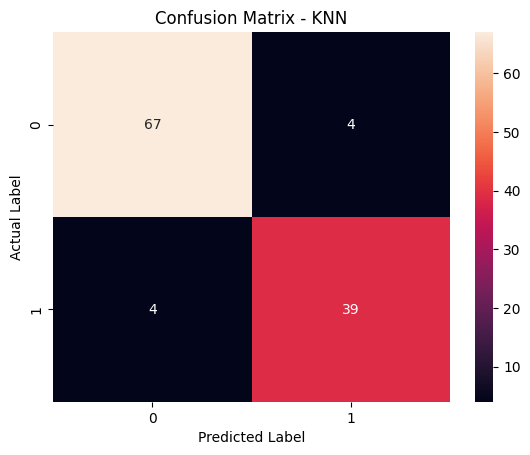


Number of Misclassified Samples: 8


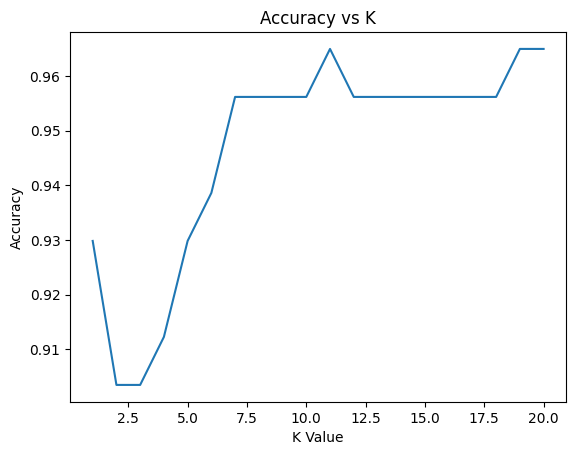

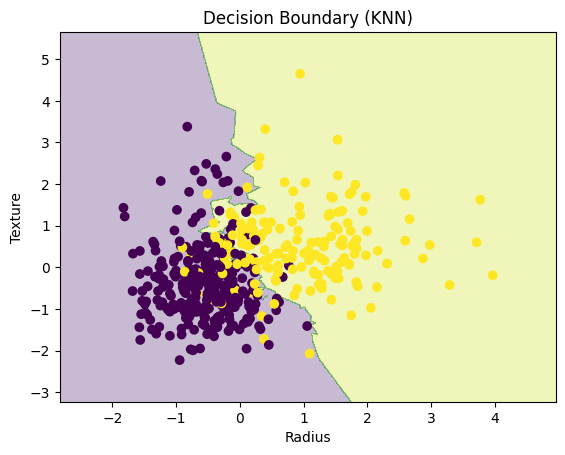

In [3]:
print("ABHISHEK J - 24BAD002")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
zip_path = r"breast cancer.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    print("Files inside ZIP:", zip_ref.namelist())
    csv_name = zip_ref.namelist()[0]
    df = pd.read_csv(zip_ref.open(csv_name))
print("\nFirst 5 Rows:")
print(df.head())
print("\nMissing Values:")
print(df.isnull().sum())
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean']]
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - KNN")
plt.show()
misclassified = np.where(y_test != y_pred)
print("\nNumber of Misclassified Samples:", len(misclassified[0]))
accuracy_list = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, pred))
plt.figure()
plt.plot(range(1,21), accuracy_list)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()
X2 = df[['radius_mean','texture_mean']]
y2 = df['diagnosis']

X2_scaled = scaler.fit_transform(X2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2_scaled, y2, test_size=0.2, random_state=42)

model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train2, y_train2)

x_min, x_max = X_train2[:,0].min()-1, X_train2[:,0].max()+1
y_min, y_max = X_train2[:,1].min()-1, X_train2[:,1].max()+1

xx, yy = np.meshgrid(np.arange(x_min,x_max,0.01),
                     np.arange(y_min,y_max,0.01))

Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train2[:,0], X_train2[:,1], c=y_train2)
plt.xlabel("Radius")
plt.ylabel("Texture")
plt.title("Decision Boundary (KNN)")
plt.show()